In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('drive/MyDrive/MASTER/DATASCIENCE/PROYECTO/DATOS/Gasto_Medio_Diario_Persona_Prov.csv', sep=';', decimal=',')

In [6]:
df.head()

,FECHA,Provincia,Gasto_Medio_Diario
0,01/01/2018,Andalucía,102
1,02/01/2018,Andalucía,102
2,03/01/2018,Andalucía,102
3,04/01/2018,Andalucía,102
4,05/01/2018,Andalucía,102


In [7]:
df.FECHA=pd.to_datetime(df.FECHA, format="%d/%m/%Y")

In [8]:
df.set_index('FECHA').resample('W')

In [9]:
df.head()

,FECHA,Provincia,Gasto_Medio_Diario
0,2018-01-01,Andalucía,102
1,2018-01-02,Andalucía,102
2,2018-01-03,Andalucía,102
3,2018-01-04,Andalucía,102
4,2018-01-05,Andalucía,102


In [10]:
df = df.set_index('FECHA')
df.head()

,Provincia,Gasto_Medio_Diario
FECHA,,
2018-01-01,Andalucía,102
2018-01-02,Andalucía,102
2018-01-03,Andalucía,102
2018-01-04,Andalucía,102
2018-01-05,Andalucía,102


In [11]:
Sevilla_df = df[df["Provincia"] == "Andalucía"]


In [12]:
Sevilla_df.head()

,Provincia,Gasto_Medio_Diario
FECHA,,
2018-01-01,Andalucía,102
2018-01-02,Andalucía,102
2018-01-03,Andalucía,102
2018-01-04,Andalucía,102
2018-01-05,Andalucía,102


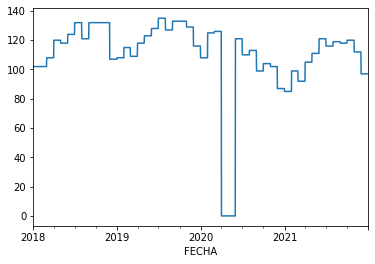

In [13]:
Sevilla_df['Gasto_Medio_Diario'].plot()

In [14]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':Sevilla_df.index,'y':Sevilla_df.Gasto_Medio_Diario})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
FECHA,,
2018-01-01,2018-01-01,102
2018-01-02,2018-01-02,102
2018-01-03,2018-01-03,102
2018-01-04,2018-01-04,102
2018-01-05,2018-01-05,102


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


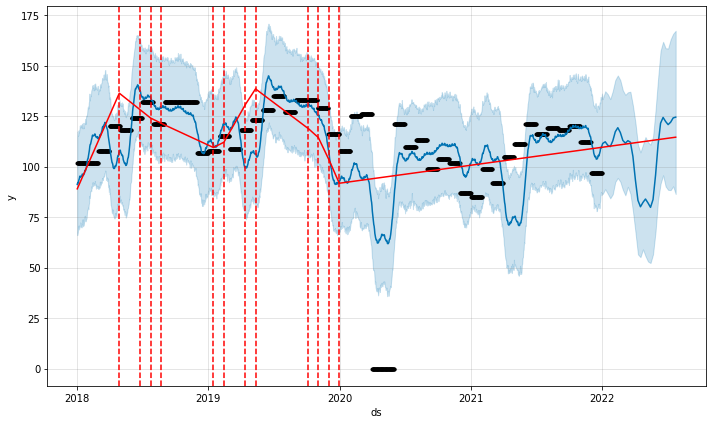

In [15]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=30, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [16]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,91.200083,66.090018,114.746112
1,2018-01-02,91.877871,67.109762,117.531028
2,2018-01-03,91.781932,68.551647,115.334729
3,2018-01-04,92.464536,69.746144,115.625444
4,2018-01-05,93.034035,70.912122,118.085406


In [17]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1486,2022-06-26,113.927019,90.230230,158.667877,92.404541,142.859682,8.466232,8.466232,8.466232,-0.087998,-0.087998,-0.087998,8.554230,8.554230,8.554230,0.0,0.0,0.0,122.393251
1487,2022-07-03,114.097602,88.516466,158.571714,91.097566,144.960737,6.748070,6.748070,6.748070,-0.087998,-0.087998,-0.087998,6.836068,6.836068,6.836068,0.0,0.0,0.0,120.845673
1488,2022-07-10,114.268186,88.397163,163.071714,89.826039,146.634932,7.776353,7.776353,7.776353,-0.087998,-0.087998,-0.087998,7.864351,7.864351,7.864351,0.0,0.0,0.0,122.044539
1489,2022-07-17,114.438769,90.284275,165.856235,88.561180,148.331358,9.730333,9.730333,9.730333,-0.087998,-0.087998,-0.087998,9.818331,9.818331,9.818331,0.0,0.0,0.0,124.169102
1490,2022-07-24,114.609353,86.442385,167.334684,86.952306,150.142511,9.937343,9.937343,9.937343,-0.087998,-0.087998,-0.087998,10.025341,10.025341,10.025341,0.0,0.0,0.0,124.546696


In [18]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('gasto_Sevilla.csv',  index=False, sep=";", decimal=",")